In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as ss
from scipy.interpolate import interp1d
from fractions import Fraction
from empiricaldist import Pmf, Cdf
import matplotlib.pyplot as plt

In [2]:
lam = 1.4
dist = ss.poisson(lam)
type(dist)

scipy.stats._distn_infrastructure.rv_discrete_frozen

In [3]:
k = 4
dist.pmf(k)

0.039471954028253146

In [4]:
def make_poisson_pmf(lam, qs):
    ps = ss.poisson(lam).pmf(qs)
    pmf = Pmf(ps, qs)
    pmf.normalize()
    return pmf

In [5]:
lam = 1.4
goals = np.arange(10)
pmf_goals = make_poisson_pmf(lam, goals)
pmf_goals

,probs
0,0.246598
1,0.345237
2,0.241666
3,0.112777
4,0.039472
5,0.011052
6,0.002579
7,0.000516
8,0.000090
9,0.000014


In [6]:
alpha = 1.4
qs = np.linspace(0, 10, 101)
ps = ss.gamma(alpha).pdf(qs)

In [7]:
prior = Pmf(ps, qs)
prior.normalize()
prior

,probs
0.0,0.000000
0.1,0.041053
0.2,0.049015
0.3,0.052160
0.4,0.052952
...,...
9.6,0.000019
9.7,0.000017
9.8,0.000016
9.9,0.000014


In [8]:
lams = prior.qs
k = 4
likelihood = ss.poisson(lams).pmf(k)

In [9]:
def update_poisson(pmf, data):
    k = data
    lams = pmf.qs
    likelihood = ss.poisson(lams).pmf(k)
    pmf *= likelihood
    pmf.normalize()

In [10]:
france = prior.copy()
update_poisson(france, 4)

In [11]:
croatia = prior.copy()
update_poisson(croatia, 2)

In [12]:
Pmf.prob_gt(france, croatia)

0.7499366290930174

In [13]:
pmf_seq = [make_poisson_pmf(lam, goals) for lam in prior.qs]
pd.DataFrame(pmf_seq)

,0,1,2,3,4,5,6,7,8,9
,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
,0.904837,0.090484,0.004524,0.000151,0.000004,7.540312e-08,1.256719e-09,1.795312e-11,2.244140e-13,2.493489e-15
,0.818731,0.163746,0.016375,0.001092,0.000055,2.183282e-06,7.277607e-08,2.079316e-09,5.198290e-11,1.155176e-12
,0.740818,0.222245,0.033337,0.003334,0.000250,1.500157e-05,7.500784e-07,3.214622e-08,1.205483e-09,4.018277e-11
,0.670320,0.268128,0.053626,0.007150,0.000715,5.720064e-05,3.813376e-06,2.179072e-07,1.089536e-08,4.842383e-10
...,...,...,...,...,...,...,...,...,...,...
,0.000133,0.001278,0.006133,0.019626,0.047103,9.043735e-02,1.446998e-01,1.984454e-01,2.381345e-01,2.540101e-01
,0.000124,0.001199,0.005813,0.018795,0.045578,8.842148e-02,1.429481e-01,1.980852e-01,2.401783e-01,2.588588e-01
,0.000115,0.001125,0.005511,0.018002,0.044105,8.644639e-02,1.411958e-01,1.976741e-01,2.421507e-01,2.636753e-01
,0.000107,0.001056,0.005226,0.017246,0.042683,8.451198e-02,1.394448e-01,1.972147e-01,2.440532e-01,2.684586e-01


In [14]:
def make_mixture(pmf, pmf_seq):
    df = pd.DataFrame(pmf_seq).fillna(0).T
    df *= np.array(pmf)
    total = df.sum(axis=1)
    return Pmf(total)

In [15]:
pred_france = make_mixture(france, pmf_seq)
pred_croatia = make_mixture(croatia, pmf_seq)

In [16]:
Pmf.prob_gt(pred_france, pred_croatia), Pmf.prob_lt(pred_france, pred_croatia), Pmf.prob_eq(pred_france, pred_croatia)

(0.5703522415934519, 0.26443376257235873, 0.16521399583418947)

In [17]:
def exp_pdf(t, lam):
    return lam * np.exp(-lam * t)

In [18]:
lam = 1.4
qs = np.linspace(0, 90, 901)
ps = exp_pdf(qs, lam)
pmf_time = Pmf(ps, qs)
pmf_time.normalize()

10.716328000266484

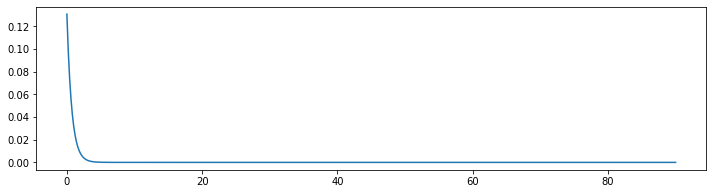

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(pmf_time)